

# Project is investigation throw TMDb movie data  (cleaned from original data on Kaggle)
###  Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>To complete my Data Analysis project I am using TMDb movies dataset. 

>This data set contains information about 10 thousand movies collected from The Movie Database (TMDb), including user ratings and revenue. It consist of 21 columns such as imdb_id, revenue, budget, vote_count etc.   

>#### **Question that can analyised from this data set**
> 1. TOP 5 movies with the highest and lowest revenue and profit
> 2. TOP 5 movies with largest and lowest budgets
> 3. TOP 5 Movies with longest and shortest runtime values
> 4. Average runtime of all the movies.
> 5. which year  had most of profitable movies.
> 6. Successful genres (with respest to the profitable movies).
> 7. Most frequent cast  (with respest to the profitable movies)
> 8. Average budget  (with respest to the profitable movies)
> 9. Average revenue  (with respest to the profitable movies)
> 10. Average duration of the movie  (with respest to the profitable movies)
  


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [24]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
#loading the csv file and storing it in the dataframe "df"
df = pd.read_csv('tmdb-movies.csv')
#printing first five rows with defined columns of tmdb-movies database
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Data Cleaning (Removing the unused information from the dataset )

**Important noting regarding this process**

 1. drop unnecessary columns such as id, imdb_id, vote_count, production_company,etc.    
 2. Some movies have zero values in budget and revenue,so need to drop such entries 
 3. drop duplicated rows (if any)  
 5. changing to date_time  in the release date column 
 6. changing the type of data from (float) into (int) in budget and revenue columns

## 1. Drop unnecessary columns : null

**[ id, imdb_id, homepage, director, tagline, keywords, production_companies, budget_adj, revenue_adj ]**

In [25]:
# drop cloumn with  not needed

drop = df.drop(columns=['id', 'imdb_id', 'homepage', 'director', 'tagline', 'keywords',
         'production_companies', 'budget_adj', 'revenue_adj'], inplace=True)

df.head()


,popularity,budget,revenue,original_title,cast,overview,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015


## 2 Drop 0 values


In [26]:
# convert 0 values to na
df.replace(0, np.nan, inplace=True)
df[df == 0].any().sum()
# drop the na  row
df.dropna(inplace=True)
na = df.isna().any().sum()
zero= df[df == 0].any().sum()
# check the data with no nan or 0
na , zero

(0, 0)

# 3 drop duplicated rows

In [27]:
# view the duplicated rows
duplicted = df[df.duplicated()].value_counts().sum()
print('there is : ',duplicted,'duplicates in the data set')



there is :  1 duplicates in the data set


In [28]:
# removing the duplicates row 

df.drop_duplicates(inplace=True)
# check for duplicated
df.duplicated().any()

False

### 4 changing the release date fromate 

In [29]:
# convert release_date to date_time
df['release_date'] = pd.to_datetime(df['release_date'], format='%m/%d/%y')


 ### 6. changing the type of data from (float) into (int) in budget and revenue columns and adding profit column

In [30]:
# convert  revenue  andbudget to int 
df.revenue = df.revenue.astype(int) 
df.budget =df.budget.astype(int)

# adding profit columns 

profit = df.revenue - df.budget
df.insert(3,'profit',profit)

df.head(1)


,popularity,budget,revenue,profit,original_title,cast,overview,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015


# to make less code in the cells i gather my functions in on cell 


In [31]:
# create function to pivot  the data 

def pivot(column):
    
    group = ['popularity','genres','budget','profit','revenue','release_date','release_year','runtime',] 
    pivot_tabl = pd.pivot_table(df,index=group,values='original_title',aggfunc=max).sort_values(by = column ,ascending =False)
    return pivot_tabl

profit_top_5 = pivot("profit").head() 
profit_low_5 = pivot("profit").tail()


# create  function to find average of a column
def avg(column):
    return df[column].mean()

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1  TOP 5 movies with the highest and lowest revenue and profit


In [32]:
# the top 5 high profit movies  and revenue
profit_top_5

,,,,,,,,original_title
popularity,genres,budget,profit,revenue,release_date,release_year,runtime,
9.432768,Action|Adventure|Fantasy|Science Fiction,237000000,2544505847,2781505847,2009-12-10,2009,162.0,Avatar
11.173104,Action|Adventure|Science Fiction|Fantasy,200000000,1868178225,2068178225,2015-12-15,2015,136.0,Star Wars: The Force Awakens
4.355219,Drama|Romance|Thriller,200000000,1645034188,1845034188,1997-11-18,1997,194.0,Titanic
32.985763,Action|Adventure|Science Fiction|Thriller,150000000,1363528810,1513528810,2015-06-09,2015,124.0,Jurassic World
9.335014,Action|Crime|Thriller,190000000,1316249360,1506249360,2015-04-01,2015,137.0,Furious 7


In [33]:
# the top 5 low profit movies and revenue
profit_low_5

,,,,,,,,original_title
popularity,genres,budget,profit,revenue,release_date,release_year,runtime,
1.653031,Animation|Adventure|Family|Fantasy,100000000,-99999750,250,2003-10-20,2003,85.0,Brother Bear
0.921653,Adventure|Animation|Family,150000000,-111007242,38992758,2011-03-09,2011,88.0,Mars Needs Moms
0.948560,Western|History|War,145000000,-119180039,25819961,2004-04-07,2004,137.0,The Alamo
1.214510,Action|Adventure|Western,255000000,-165710090,89289910,2013-07-03,2013,149.0,The Lone Ranger
0.250540,Adventure|Fantasy|Action|Western|Thriller,425000000,-413912431,11087569,2010-12-02,2010,100.0,The Warrior's Way


 ### Top 5 movies :
  1. Avatar : made over
  2. Star wars : made over 
  3. Titanic : made over 
  4. Jurassic World 
  5. Furious 7 


### Lowest movies :
  1.  Brother Bear 
  2. Mars Needs Moms
  3. The Alamo
  4. The Lone Ranger
  5. The Warrior's way 

### Research Question 2 Top 5 largest and lowest budget 


In [48]:
# pivot the budget 
budget_top_5 =pivot('budget').head()
budget_low_5 =pivot('budget').tail()

# the top 5 largest 
budget_top_5

,,,,,,,,original_title
popularity,genres,budget,profit,revenue,release_date,release_year,runtime,
0.250540,Adventure|Fantasy|Action|Western|Thriller,425000000,-413912431,11087569,2010-12-02,2010,100.0,The Warrior's Way
4.955130,Adventure|Action|Fantasy,380000000,641683000,1021683000,2011-05-11,2011,136.0,Pirates of the Caribbean: On Stranger Tides
4.965391,Adventure|Fantasy|Action,300000000,661000000,961000000,2007-05-19,2007,169.0,Pirates of the Caribbean: At World's End
5.944927,Action|Adventure|Science Fiction,280000000,1125035767,1405035767,2015-04-22,2015,141.0,Avengers: Age of Ultron
1.957331,Adventure|Fantasy|Action|Science Fiction,270000000,121081192,391081192,2006-06-28,2006,154.0,Superman Returns


In [35]:
budget_low_5

,,,,,,,,original_title
popularity,genres,budget,profit,revenue,release_date,release_year,runtime,
0.028456,Drama|Comedy,3,40,43,2010-02-14,2010,87.0,Boy
0.317091,Fantasy|Horror|Comedy,3,13,16,1990-05-03,1990,93.0,Tales from the Darkside: The Movie
0.464188,Action|Crime|Thriller,2,14,16,1982-02-20,1982,88.0,Death Wish 2
0.090186,Comedy|Romance,1,99,100,1999-04-23,1999,95.0,Lost & Found
0.520430,Comedy|Romance,1,1377,1378,2011-06-03,2011,90.0,"Love, Wedding, Marriage"


### movies with high budget :
1. The Warrior's Way
2. Pirates of the Caribbean: On Stranger Tides
3. Pirates of the Caribbean: At World's End
4. Avengers: Age of Ultron
5. Superman Returns
### Lowest movies budget : 
1. Love, Wedding, Marriage
2. Lost & Found
3. Death Wish 2
4. Tales from the Darkside: The Movie
5. Boy



###  Research Question  3 TOP 5 Movies with longest and shortest runtime values

In [36]:
runtime_top_5=pivot('runtime').head(5)
runtime_low_5=pivot('runtime').tail()

runtime_top_5

,,,,,,,,original_title
popularity,genres,budget,profit,revenue,release_date,release_year,runtime,
0.534192,Crime|Drama|Thriller|History,18000000,-17128721,871279,2010-05-19,2010,338.0,Carlos
0.804533,Drama|History|Romance,31115000,26635000,57750000,2063-06-12,1963,248.0,Cleopatra
0.418950,Action|Drama|History|Western,44000000,-40515669,3484331,1980-11-19,1980,219.0,Heaven's Gate
1.168767,Adventure|Drama|History|War,15000000,55000000,70000000,2062-12-10,1962,216.0,Lawrence of Arabia
0.469518,Drama|History|War,56000000,-43076064,12923936,2003-02-21,2003,214.0,Gods and Generals


In [37]:
runtime_low_5

,,,,,,,,original_title
popularity,genres,budget,profit,revenue,release_date,release_year,runtime,
1.425344,Animation|Family,30000000,-15540000,14460000,2011-04-13,2011,63.0,Winnie the Pooh
0.331313,Comedy,250000,750000,1000000,2011-12-10,2011,62.0,Louis C.K.: Live at the Beacon Theater
0.352054,Adventure|Action|Comedy|Science Fiction|Music,200000,-199997,3,2008-07-15,2008,42.0,Dr. Horrible's Sing-Along Blog
0.592219,Family|Animation,3000000,18000000,21000000,1983-10-19,1983,26.0,Mickey's Christmas Carol
0.208637,Science Fiction|Animation,10,-5,5,2003-06-02,2003,15.0,Kid's Story


### Longest Top 5 movies :
1. Carlos --3380 minute
2. Cleopatra --248 minute
3. Heaven's Gate --219 minute
4.  Lawrence of Arabia --216 minute
5. Gods and Generals --214 minute
### shortest runtime movies :
1. Kid's Story 15 minute
2. Mickey's Christmas Carol --26 minute
3. Dr. Horrible's Sing-Along Blog --42 minute
4. Louis C.K.: Live at the Beacon Theater --62 minute
5. Winnie the Pooh -- 63 minute



### Research Question 4 Top 5 runtime of all the movies.

In [38]:
avg('runtime')

109.22883116883116

In [51]:
df['runtime'].describe()

count    3850.000000
mean      109.228831
std        19.924053
min        15.000000
25%        95.250000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

>By looking at both the plot and calculations, we can conclude that..
>
> 1. 25% of movies have a runtime of less than 95 minutes
> 2. 50% of movies have a runtime of less than 109 minutes. (median)
> 3. 75% of movies have a runtime of less than 119 minutes


### the average of runtime for movie is 109 minute 

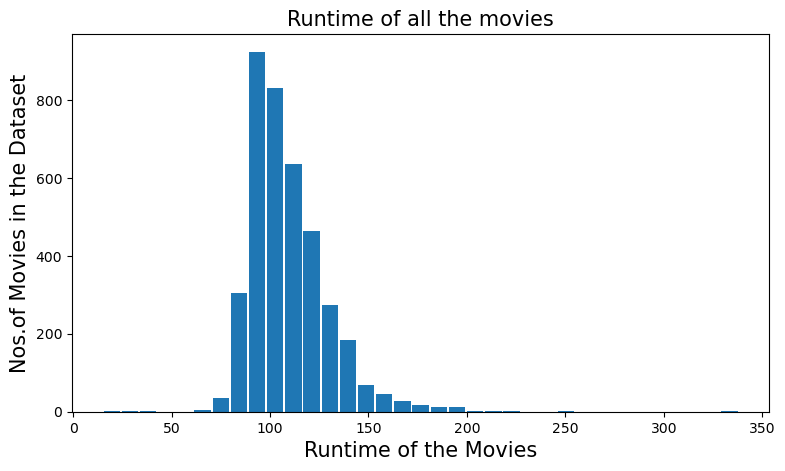

In [49]:
#plotting a histogram of runtime of movies

#giving the figure size(width, height)
plt.figure(figsize=(9,5), dpi = 100)

#On x-axis 
plt.xlabel('Runtime of the Movies', fontsize = 15)
#On y-axis 
plt.ylabel('Nos.of Movies in the Dataset', fontsize=15)
#Name of the graph
plt.title('Runtime of all the movies', fontsize=15)

#giving a histogram plot
plt.hist(df['runtime'], rwidth = 0.9, bins =35)
#displays the plot
plt.show()

 > The distribution of the above graph is   right skewed! Most of the movies are timed between 80 to 115 minutes. Almost 1000 and more no.of movies fall in this criteria. 

### Research Question 5 which year  had most of profitable movies.

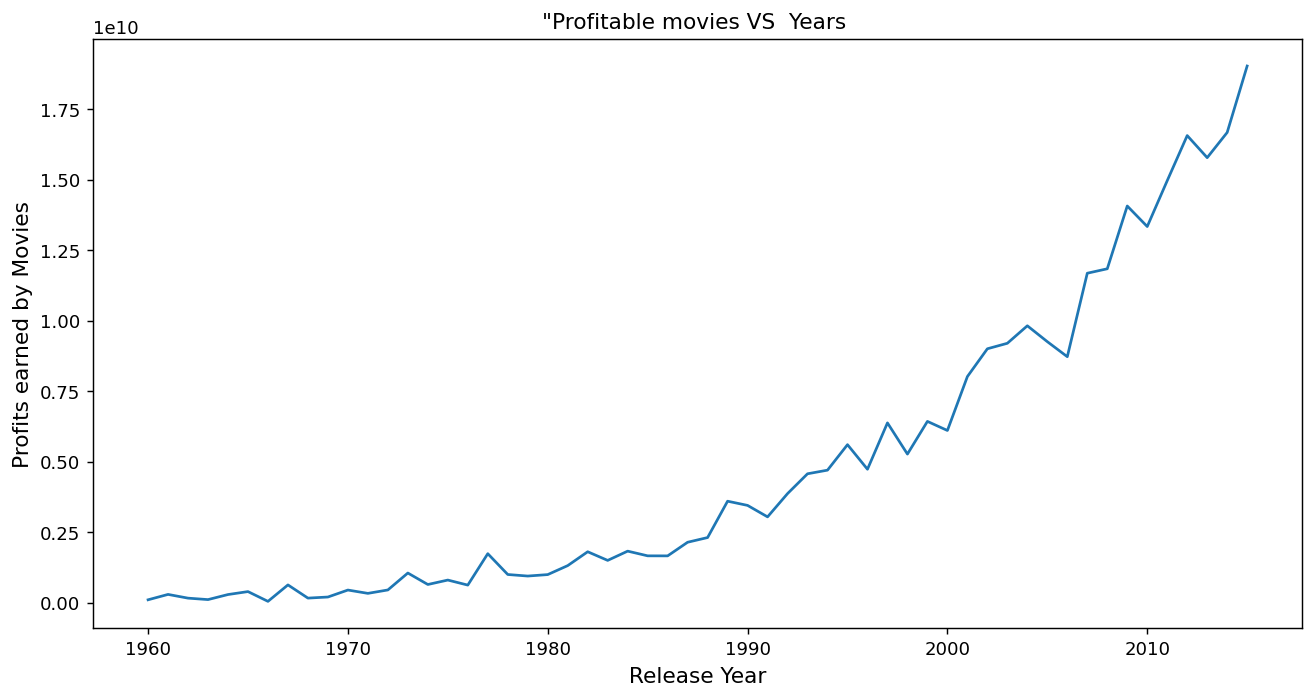

In [39]:
year_profit = df.groupby('release_year')['profit'].sum()
#figure size(width, height)


plt.figure(figsize=(12,6), dpi = 130)

#on x-axis
plt.xlabel(' Release Year ', fontsize = 12)
#on y-axis
plt.ylabel('Profits earned by Movies', fontsize = 12)
#title of the line plot
plt.title('"Profitable movies VS  Years ')

#plotting the graph
plt.plot(year_profit);



### Research Question 6 Successful genres (to the profitable movies)

### This far we want to clean more about profit movies so let's say that the movie considered profitable is form 60 million or above 

In [40]:
# so in this far we want to clean more

profit_movies = df[df['profit']>=60000000]

profit_movies.head(5)



def call(column):
    #will take a column, and separate the string by '|'
    data_series = profit_movies[column].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    data_series = pd.Series(data_series.split('|'))
    
    #arranging in descending order
    count = data_series.value_counts(ascending = False)
    
    return count


def average_p (column):
    return profit_movies[column].mean()


In [54]:
len(profit_movies)

1197

### so te data reduced from 3850 to 1197

In [41]:

gener = call('genres')

gener

Comedy             434
Action             426
Drama              419
Thriller           358
Adventure          348
Family             208
Romance            194
Science Fiction    188
Fantasy            183
Crime              167
Animation          116
Horror             109
Mystery             99
Music               45
War                 42
History             33
Western             14
Documentary          4
Foreign              1
dtype: int64

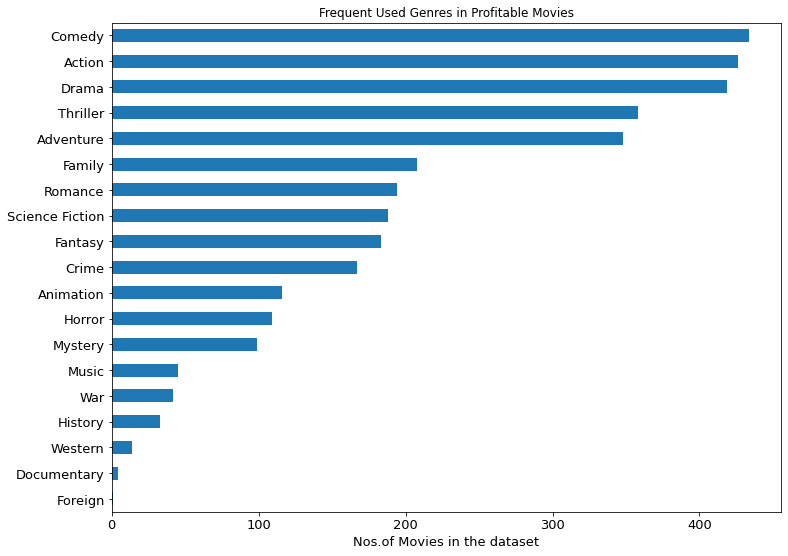

In [42]:
# visual the gener 

gener.sort_values(ascending = True, inplace = True)

#ploting
lt = gener.plot.barh( fontsize = 13)

#title
lt.set(title = 'Frequent Used Genres in Profitable Movies')

# on x axis
lt.set_xlabel('Nos.of Movies in the dataset', color = 'black', fontsize = '13', )

#figure size(width, height)
lt.figure.set_size_inches(12, 9)


### from the graph above we can see that Comedy and action are top genres  

### Research Question 7  Most frequent cast  (to the profitable movies)

In [55]:
# now the most frequnet cast is 
cast =call('cast')
cast.head(5)

Tom Cruise            26
Tom Hanks             22
Brad Pitt             22
Sylvester Stallone    21
Cameron Diaz          20
dtype: int64

> As expecteted Tom Cruise is on the top with total 27 cast followed by Brad Pitt with 25 and Tom Hanks with 22.  

### Research Question 8 Averag budget  (to the profitable movies)

In [44]:
average_p('budget')

63757867.39515455

> So the movies having profit of 60 million dollar and more have an average budget of 63 million dollar.

### Research Question 9  Average revenue  (to the profitable movies)

In [45]:
average_p('revenue')

274739298.8086884

>So the movies having profit of 60 million dollar and more have an average revenue of 274 million dollar.

### Research Question 10  Average duration of the movie  (to the profitable movies)

### here is strip plot blot  that where is average movie time been 


/home/ahmed_elesali/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


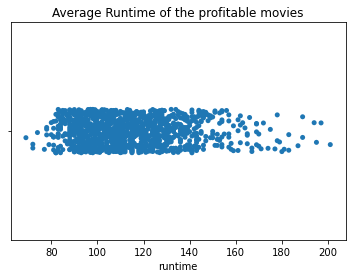

In [63]:

# visual the run time average of the profitable movie 
sns.stripplot(profit_movies['runtime'])
plt.title('Average Runtime of the profitable movies');


In [47]:
average_p('runtime')


114.06850459482038

>So the movies having profit of 60 million dollar and more have an average duration of 114 minutes.

<a id='conclusions'></a>
## Conclusions
> This was a very interesting data analysis. We came out with some very interesting facts about movies. After this analysis we can conclude following:
>
> **For a Movie to be in successful criteria**
> 1. Average Budget must be around 60 millon dollar
> 2. Average duration of the movie must be 114 minutes 
> 3. Any one of these should be in the cast :Tom Cruise, Brad Pitt, Tom Hanks, Sylvester Stallone,Cameron Diaz
> 4. Genre must be : Comedy,Action, Adventure,Drama , Thriller.
>
> By doing all this the movie might be one of the hits and hence can earn an average revenue of around 270 million  dollar.
>
>**Limitations: **This analysis was done considering the movies which had a significant amount of profit of around 50 million dollar. This might not be completely error free but by following these suggestion one can increase the probability of a movie to become a hit. Moreover we are not sure if the data provided to us is completel corect and up-to-date. As mentioned before the budget and revenue column do not have currency unit, it might be possible different movies have budget in different currency according to the country they are produce in. So a disparity arises here which can state the complete analysis wrong. Dropping the rows with missing values also affected the overall analysis. 
